In [97]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
# import OECD.csv and select features
oecd = pd.read_csv('data_source/OECD.csv')

oecd = oecd.loc[(oecd['Subject']=='Real effective exchange rates')
                |(oecd['Subject']=='Value added in financial and insurance activities')
                |(oecd['Subject']=='General government net lending')
                |(oecd['Subject']=='Households debt')
                |(oecd['Subject']=='CPI: all items')]
               #|(oecd['Subject']=='Inflows of foreign direct investment')
               #|(oecd['Subject']=='Trade balance of goods')
               #|(oecd['Subject']=='Trade balance of services')
               #|(oecd['Subject']=='Outflows of foreign direct investment')]
oecd = oecd[['Subject','Country','Year','Value']]

In [99]:
# import gdp.csv
gdp = pd.read_csv('data_source/gdp.csv')
gdp = gdp.loc[gdp['MEASURE']=='VXVOB']
gdp = gdp[['Transaction','Country','Year','Value']]
gdp = gdp.rename(columns={'Transaction':'Subject'})

In [100]:
# import non-finance.csv and pick measure CXC in Non-financial corporations
nonfinance = pd.read_csv('data_source/non-finance.csv')
nonfinance = nonfinance.loc[(nonfinance['MEASURE']=='CXC') & (nonfinance['Sector']=='Non-financial corporations')]
nonfinance = nonfinance[['Transaction', 'Country', 'Time', 'Value']]
nonfinance = nonfinance.rename(columns={'Transaction':'Subject','Time':'Year'})

In [101]:
def oecd_combine(df):
    # drop unnecessary columns
    df = df.drop(['Unnamed: 0', 'Country Code', 'Indicator Code', 'V65'], axis=1)
    # change from wide to long format
    df = df.pivot_table(index='Country Name', columns='Indicator Name').unstack().reset_index()
    # rename columns
    df = df.rename(columns={'level_0':'Year', 'Indicator Name':'Subject',
                                       'Country Name':'Country', 0:'Value'})
    convert_dict = {'Year': int, 
                'Value': float
               } 
  
    df = df.astype(convert_dict) 
    
    return df

In [102]:
fdi_inflow = pd.read_csv('data_source/inflow.csv')
fdi_inflow = oecd_combine(fdi_inflow)

In [103]:
fdi_outflow = pd.read_csv('data_source/outflow.csv')
fdi_outflow = oecd_combine(fdi_outflow)

In [104]:
net_finance = pd.read_csv('data_source/netfinance.csv')
net_finance = oecd_combine(net_finance)

In [105]:
trade_balance = pd.read_csv('data_source/netgoodservices.csv')
trade_balance = oecd_combine(trade_balance)

In [106]:
# append to oecd 
oecd_full = oecd.append([gdp, nonfinance, fdi_inflow, fdi_outflow, net_finance, trade_balance])

In [107]:
oecd_full = oecd_full.sort_values(by=['Country', 'Subject', 'Year'])

In [108]:
oecd_full.head()

,Country,Subject,Value,Year
0,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",0.013151,1970
246,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",0.024575,1971
492,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",0.009401,1972
738,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",0.015577,1973
984,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",NaN,1974


In [109]:
oecd_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58072 entries, 0 to 11681
Data columns (total 4 columns):
Country    58072 non-null object
Subject    58072 non-null object
Value      45136 non-null float64
Year       58072 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [110]:
temp = oecd_full.pivot_table(values='Value', index=['Country', 'Year'], columns=['Subject']).reset_index()

In [111]:
temp

Subject,Country,Year,CPI: all items,"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",General government net lending,Gross domestic product (output approach),Households debt,"Net financial flows, IDA (NFL, current US$)",Net financial transactions,"Net trade in goods and services (BoP, current US$)",Real effective exchange rates,Value added in financial and insurance activities
0,Afghanistan,1970,NaN,0.013151,0.013151,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,1971,NaN,0.024575,0.024575,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1972,NaN,0.009401,0.009401,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1973,NaN,0.015577,0.015577,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,Zimbabwe,2014,NaN,2.425173,2.794488,NaN,NaN,NaN,NaN,NaN,-4.141642e+09,NaN,NaN
12309,Zimbabwe,2015,NaN,1.999687,2.108889,NaN,NaN,NaN,NaN,NaN,-3.539703e+09,NaN,NaN
12310,Zimbabwe,2016,NaN,1.669274,1.809413,NaN,NaN,NaN,NaN,NaN,-2.367022e+09,NaN,NaN
12311,Zimbabwe,2017,NaN,1.083538,1.531668,NaN,NaN,NaN,NaN,NaN,-1.844432e+09,NaN,NaN


In [112]:
oecd_country = temp.loc[(temp['Country']=='Australia')|(temp['Country']=='Austria')|
                       (temp['Country']=='Belgium')|(temp['Country']=='Canada')|
                       (temp['Country']=='Chile')|(temp['Country']=='Czech Republic')|
                       (temp['Country']=='Denmark')|(temp['Country']=='Estonia')|
                       (temp['Country']=='Finland')|(temp['Country']=='France')|
                       (temp['Country']=='Germany')|(temp['Country']=='Greece')|
                       (temp['Country']=='Hungary')|(temp['Country']=='Iceland')|
                       (temp['Country']=='Ireland')|(temp['Country']=='Israel')|
                       (temp['Country']=='Italy')|(temp['Country']=='Japan')|
                       (temp['Country']=='Korea')|(temp['Country']=='Latvia')|
                       (temp['Country']=='Lithuania')|(temp['Country']=='Luxembourg')|
                       (temp['Country']=='Mexico')|(temp['Country']=='Netherlands')|
                       (temp['Country']=='New Zealand')|(temp['Country']=='Norway')|
                       (temp['Country']=='Poland')|(temp['Country']=='portugal')|
                       (temp['Country']=='Slovak Republic')|(temp['Country']=='Slovenia')|
                       (temp['Country']=='Spain')|(temp['Country']=='Sweden')|
                       (temp['Country']=='Switzerland')|(temp['Country']=='Turkey')|
                       (temp['Country']=='United Kingdom')|(temp['Country']=='United States')|
                       (temp['Country']=="China (People's Republic of)")|(temp['Country']=='Russia')|
                       (temp['Country']=='India')|(temp['Country']=='Brazil')|
                       (temp['Country']=='South Africa')]

In [113]:
oecd_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259 entries, 451 to 11780
Data columns (total 13 columns):
Country                                               2259 non-null object
Year                                                  2259 non-null int64
CPI: all items                                        2086 non-null float64
Foreign direct investment, net inflows (% of GDP)     1585 non-null float64
Foreign direct investment, net outflows (% of GDP)    1585 non-null float64
General government net lending                        976 non-null float64
Gross domestic product (output approach)              1728 non-null float64
Households debt                                       672 non-null float64
Net financial flows, IDA (NFL, current US$)           922 non-null float64
Net financial transactions                            601 non-null float64
Net trade in goods and services (BoP, current US$)    1410 non-null float64
Real effective exchange rates                         1630 no

In [114]:
oecd_country = oecd_country.rename(columns={"CPI: all items": "C_cpi", 
                     "Foreign direct investment, net inflows (% of GDP)": "C_fdi_inflow%", 
                     "Foreign direct investment, net outflows (% of GDP)": "C_fdi_outflow%",
                     "General government net lending": "IV_lending",
                     "Gross domestic product (output approach)": "C_gdp",
                     "Households debt": "DV_debt",
                     "Real effective exchange rates": "C_REER",
                     "Value added in financial and insurance activities": "DV_VA",
                     "Net financial transactions": "DV_nonfinance",
                     "Net financial flows, IDA (NFL, current US$)": "C_NFL",
                     "Net trade in goods and services (BoP, current US$)": "IV_trade_balance"
                                           })

In [115]:
oecd_country.head()

Subject,Country,Year,C_cpi,C_fdi_inflow%,C_fdi_outflow%,IV_lending,C_gdp,DV_debt,C_NFL,DV_nonfinance,IV_trade_balance,C_REER,DV_VA
451,Australia,1950,8.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,Australia,1951,19.428570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,Australia,1952,17.224880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,Australia,1953,4.489796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,Australia,1954,1.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


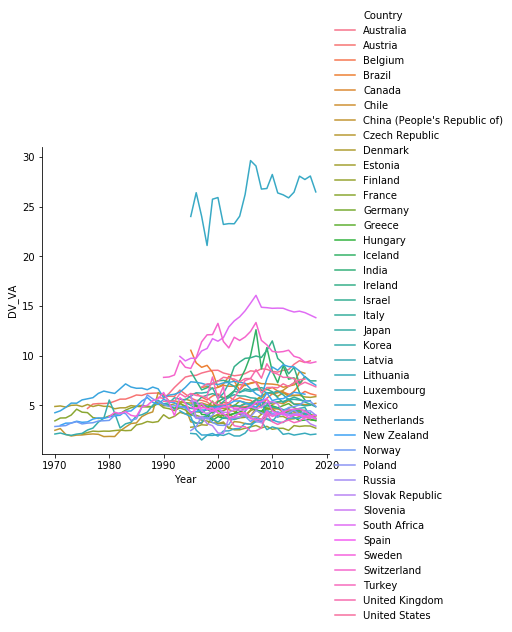

In [120]:
sns.relplot(data = oecd_country, x='Year', y='DV_VA', hue='Country',kind='line')

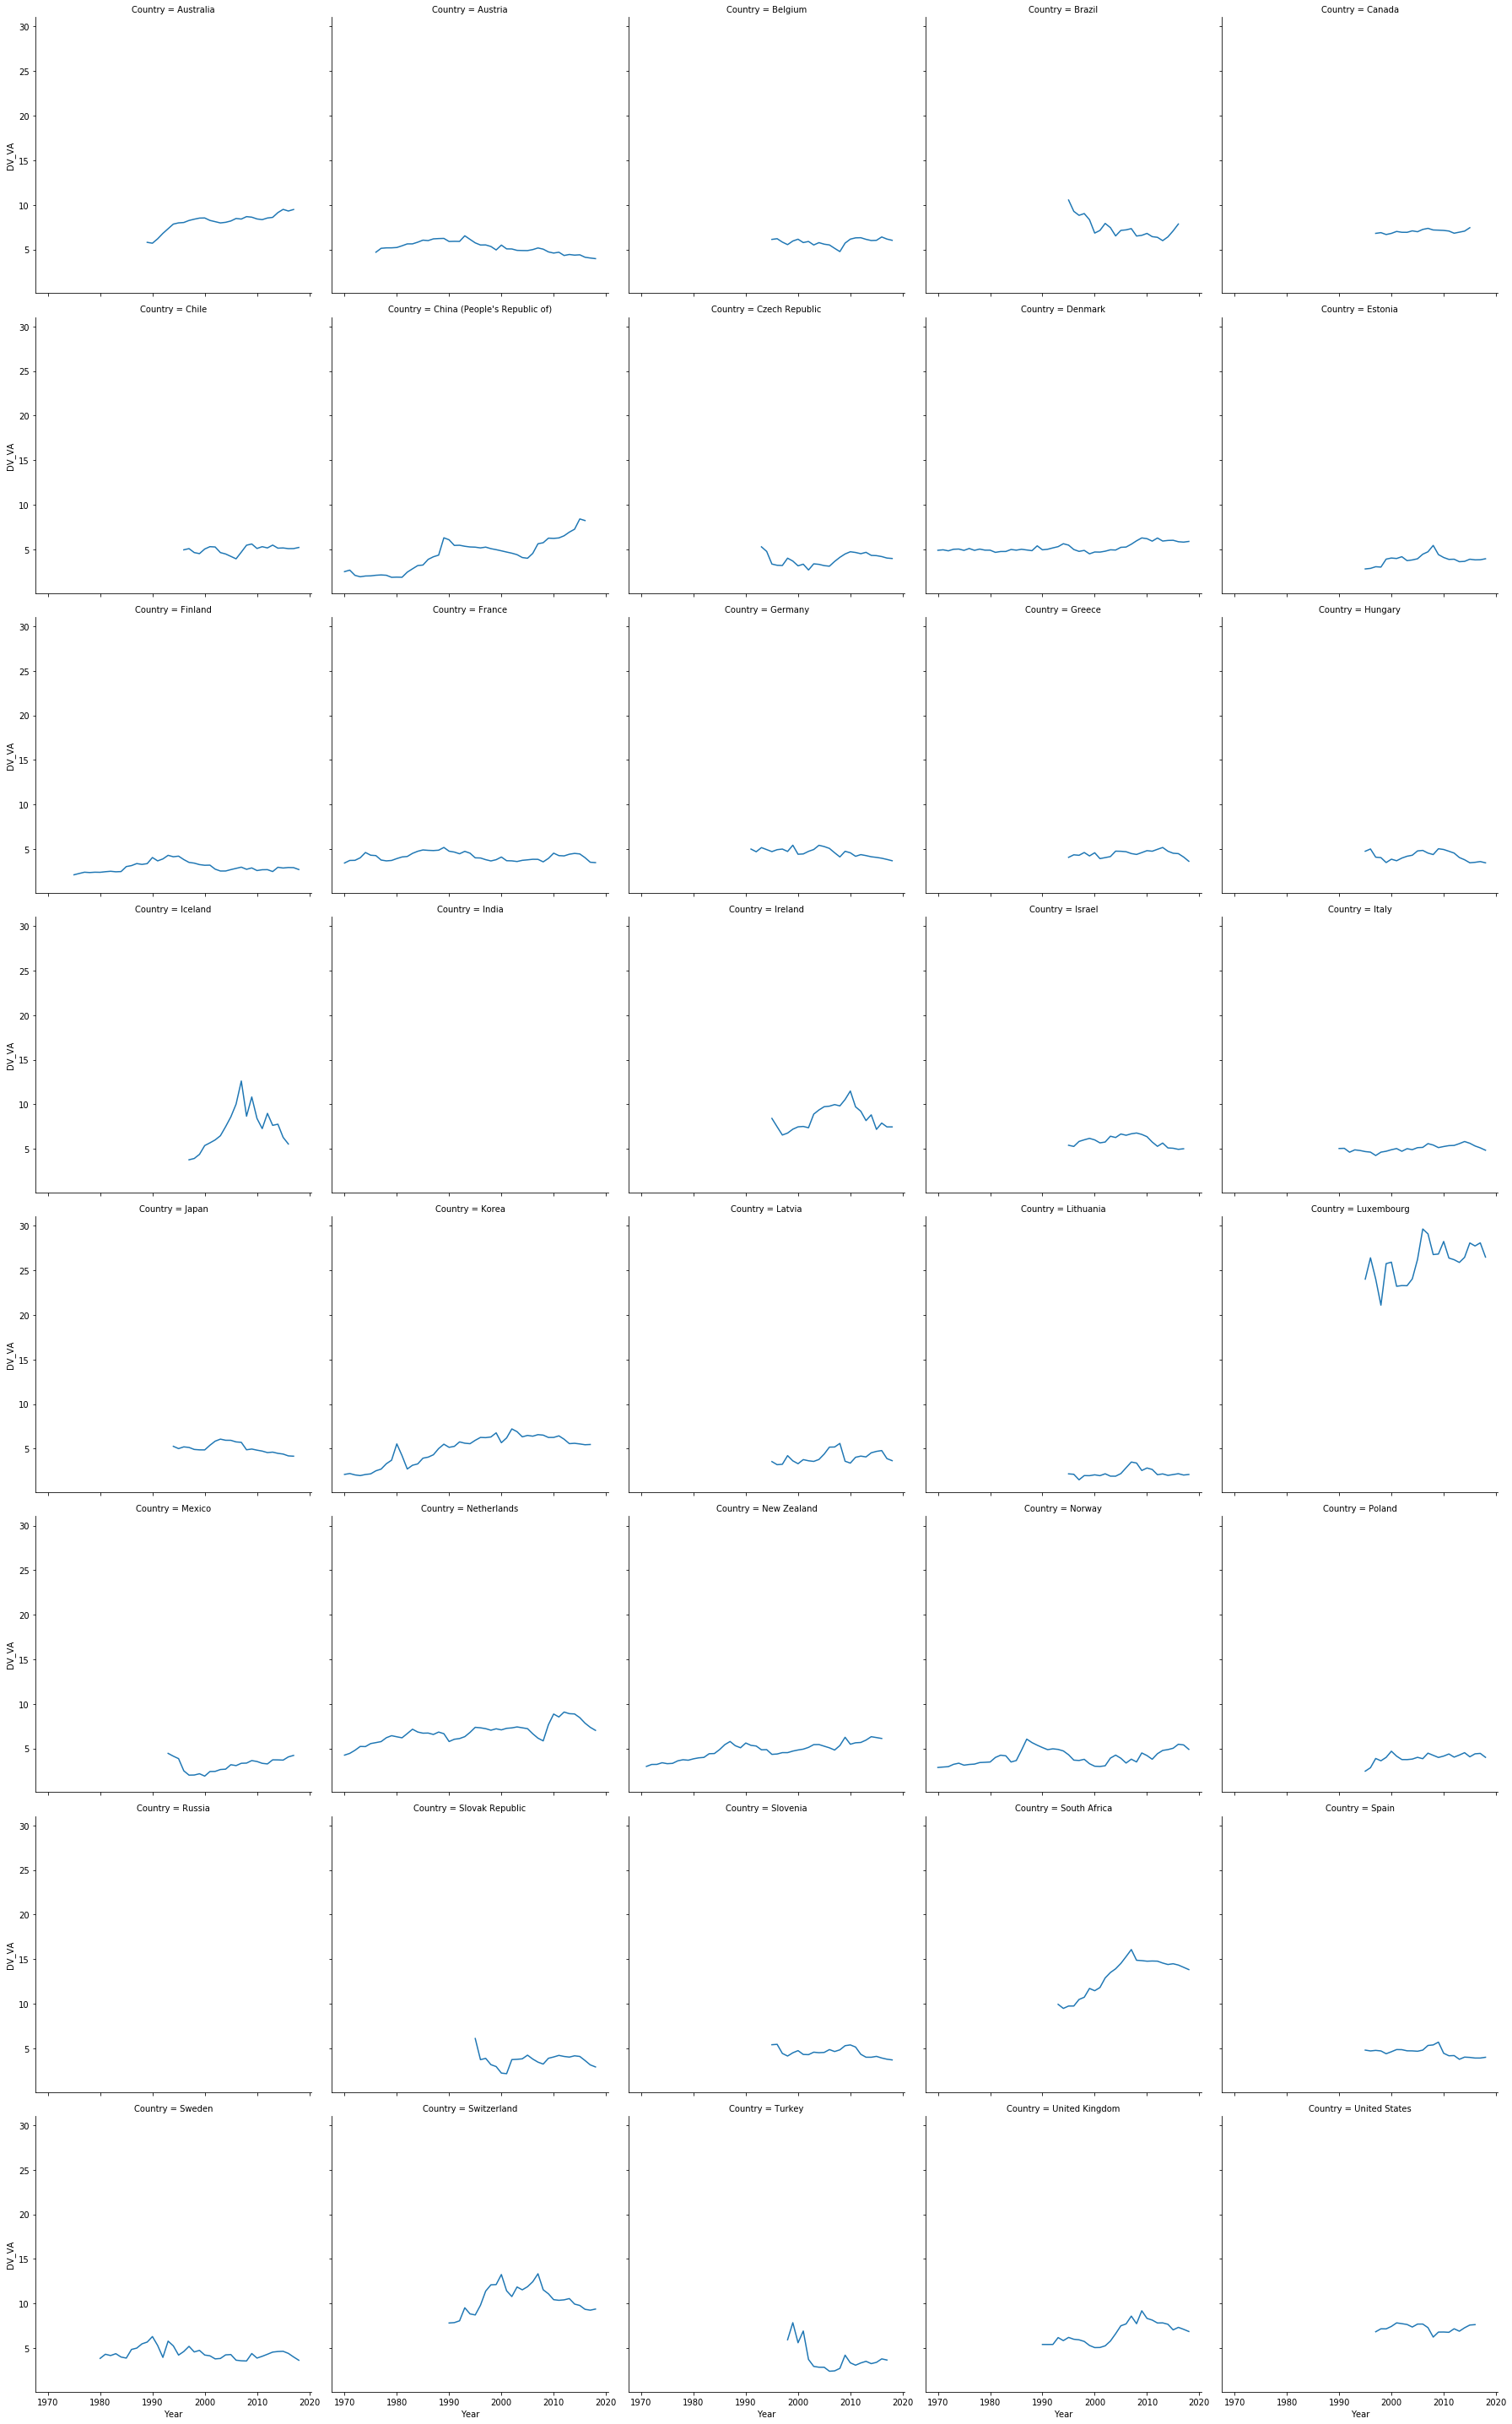

In [122]:
sns.relplot(data = oecd_country, x='Year', y='DV_VA', col='Country',kind='line',col_wrap=5)

In [116]:
oecd_percent = oecd_country
# get percent change of CPI
oecd_percent['C_cpiplus']=oecd_country['C_cpi'].pct_change()

In [117]:
oecd_percent['C_gdpplus']=oecd_percent['C_gdp'].pct_change()

In [118]:
oecd_percent['DV_nonfinanceplus']=oecd_percent['DV_nonfinance'].pct_change()

In [21]:
#oecd_percent['IV_m2plus']=oecd_percent['IV_m2USD'].pct_change()

In [119]:
oecd_percent['C_cpiplus'] = np.log(oecd_percent['C_cpiplus']+1)
#oecd_percent['IV_m2plus'] = np.log(oecd_percent['IV_m2plus']+0.3)

In [120]:
oecd_percent_corr = oecd_percent.groupby('Country').corr()
oecd_percent_corr.to_csv('oecd_percent_corr.csv')
oecd_percent.to_csv('oecd_percent.csv')

In [79]:
oecd_percent_corr

Subject                             C_cpi  C_fdi_inflow%  C_fdi_outflow%  \
Country       Subject                                                      
Australia     C_cpi              1.000000            NaN             NaN   
              C_fdi_inflow%           NaN       1.000000        0.482935   
              C_fdi_outflow%          NaN       0.482935        1.000000   
              IV_lending        -0.376243            NaN             NaN   
              C_gdp             -0.373498            NaN             NaN   
...                                   ...            ...             ...   
United States C_REER            -0.142226            NaN             NaN   
              DV_VA             -0.015956            NaN             NaN   
              C_cpiplus          0.171617            NaN             NaN   
              C_gdpplus          0.114211            NaN             NaN   
              DV_nonfinanceplus       NaN            NaN             NaN   

Subject                          IV_lending     C_gdp   DV_debt  C_NFL  \
Country       Subject                                                    
Australia     C_cpi               -0.376243 -0.373498 -0.119506    NaN   
              C_fdi_inflow%             NaN       NaN       NaN    NaN   
              C_fdi_outflow%            NaN       NaN       NaN    NaN   
              IV_lending           1.000000  0.316845 -0.316175    NaN   
              C_gdp                0.316845  1.000000  0.947214    NaN   
...                                     ...       ...       ...    ...   
United States C_REER               0.170142 -0.175802 -0.193348    NaN   
              DV_VA                0.460247 -0.047369 -0.147056    NaN   
              C_cpiplus            0.072444  0.054620  0.060382    NaN   
              C_gdpplus            0.120698 -0.255507 -0.481495    NaN   
              DV_nonfinanceplus         NaN       NaN       NaN    NaN   

Subject                          DV_nonfinance  IV_trade_balance    C_REER  \
Country       Subject                                                        
Australia     C_cpi                   0.047911               NaN  0.443785   
              C_fdi_inflow%                NaN         -0.073090       NaN   
              C_fdi_outflow%               NaN         -0.026347       NaN   
              IV_lending             -0.343380               NaN -0.379542   
              C_gdp                  -0.419102               NaN -0.034081   
...                                        ...               ...       ...   
United States C_REER                       NaN               NaN  1.000000   
              DV_VA                        NaN               NaN  0.712197   
              C_cpiplus                    NaN               NaN -0.101715   
              C_gdpplus                    NaN               NaN  0.250740   
              DV_nonfinanceplus            NaN               NaN       NaN   

Subject                             DV_VA  C_cpiplus  C_gdpplus  \
Country       Subject                                             
Australia     C_cpi             -0.555295   0.209287  -0.287995   
              C_fdi_inflow%           NaN        NaN        NaN   
              C_fdi_outflow%          NaN        NaN        NaN   
              IV_lending         0.302132   0.134434   0.289210   
              C_gdp              0.816800  -0.125256  -0.252727   
...                                   ...        ...        ...   
United States C_REER             0.712197  -0.101715   0.250740   
              DV_VA              1.000000  -0.061598   0.299176   
              C_cpiplus         -0.061598   1.000000   0.003138   
              C_gdpplus          0.299176   0.003138   1.000000   
              DV_nonfinanceplus       NaN        NaN        NaN   

Subject                          DV_nonfinanceplus  
Country       Subject                               
Australia     C_cpi                      -0.184280  
  

In [121]:
oecd_percent.head()

Subject,Country,Year,C_cpi,C_fdi_inflow%,C_fdi_outflow%,IV_lending,C_gdp,DV_debt,C_NFL,DV_nonfinance,IV_trade_balance,C_REER,DV_VA,C_cpiplus,C_gdpplus,DV_nonfinanceplus
451,Australia,1950,8.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,Australia,1951,19.428570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803922,NaN,NaN
453,Australia,1952,17.224880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.120390,NaN,NaN
454,Australia,1953,4.489796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.344548,NaN,NaN
455,Australia,1954,1.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.055520,NaN,NaN


In [122]:
oecd_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259 entries, 451 to 11780
Data columns (total 16 columns):
Country              2259 non-null object
Year                 2259 non-null int64
C_cpi                2086 non-null float64
C_fdi_inflow%        1585 non-null float64
C_fdi_outflow%       1585 non-null float64
IV_lending           976 non-null float64
C_gdp                1728 non-null float64
DV_debt              672 non-null float64
C_NFL                922 non-null float64
DV_nonfinance        601 non-null float64
IV_trade_balance     1410 non-null float64
C_REER               1630 non-null float64
DV_VA                1143 non-null float64
C_cpiplus            2162 non-null float64
C_gdpplus            2249 non-null float64
DV_nonfinanceplus    2219 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 300.0+ KB


In [123]:
# observe null values and zero values in each variable
def missing_val(col):
    df_zero = oecd_percent[oecd_percent[col]==0].groupby(['Country']).min().iloc[:,:1]
    if df_zero.empty == True: 
        df_null = pd.DataFrame(oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].first())
        df_null['End-Year'] = oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].last()
        df_null['Count'] = oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].count()
        col_missing = df_null
    else:
        df_zero['End-Year'] = oecd_percent[oecd_percent[col]==0].groupby(['Country']).max().iloc[:,:1]
        df_zero['Count'] = oecd_percent[oecd_percent[col]==0].groupby(['Country']).count().iloc[:,:1]
        df_null = pd.DataFrame(oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].first())
        df_null['End-Year'] = oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].last()
        df_null['Count'] = oecd_percent[oecd_percent[col].isnull()].groupby('Country')['Year'].count()
        col_missing = df_zero.append(df_null)
    
    return col_missing

In [124]:
for i in range(11):
    print(oecd_percent.columns[2:][i], missing_val(oecd_percent.columns[2:][i]))

C_cpi                               Year  End-Year  Count
Country                                            
Brazil                        1970      1980     11
Chile                         1970      1970      1
China (People's Republic of)  1970      1984     15
Czech Republic                1970      1991     22
Denmark                       1966      1966      1
Estonia                       1970      1997     28
France                        1951      1955      5
Iceland                       1970      1975      6
India                         1951      1957      7
Ireland                       1970      1975      6
Israel                        1960      1970      8
Latvia                        1982      1984      3
Lithuania                     1982      1984      3
Poland                        1976      1989     14
Slovak Republic               1970      1991     22
Slovenia                      1970      1980     11
Sweden                        1951      1955      5
United

DV_debt                               Year  End-Year  Count
Country                                            
Australia                     1950      2018     46
Austria                       1959      2018     37
Belgium                       1956      2018     40
Brazil                        1970      2018     42
Canada                        1950      2018     46
Chile                         1970      2018     36
China (People's Republic of)  1970      2018     49
Czech Republic                1970      2018     26
Denmark                       1966      2018     30
Estonia                       1970      2018     26
Finland                       1956      2018     40
France                        1951      2018     45
Germany                       1956      2018     40
Greece                        1956      2018     40
Hungary                       1981      2018     15
Iceland                       1956      2018     61
India                         1951      2018     68
Irel

DV_VA                               Year  End-Year  Count
Country                                            
Australia                     1950      2018     40
Austria                       1959      1975     17
Belgium                       1956      1994     39
Brazil                        1970      2018     27
Canada                        1950      2018     50
Chile                         1970      1995     26
China (People's Republic of)  2017      2018      2
Czech Republic                1970      1992     23
Denmark                       1966      1969      4
Estonia                       1970      1994     25
Finland                       1956      1974     19
France                        1951      1969     19
Germany                       1956      1990     35
Greece                        1956      1994     39
Hungary                       1981      1994     14
Iceland                       1956      2018     41
India                         1951      2018     68
Irelan